# nmi | 2023 spring
## lecture 11 : numerical differentiation


## 5 numerical differentiation and integration

computational calculus - to compute derivatives and integrals of functions - can be done numerically or symbolically. if trig derivatives are the problem, symbolic is a nice life. if lists of data are the problem, numeric is the only choice bc the function is unknwon.
</br>


### 5.1 numerical differentiation


#### 5.1.1 finite difference formulas


definition, for the derivative of $f(x)$ at $x$
</br></br>

$$f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
</br>

provided a limit exists. if $f$ is twice continuously differentiable, by taylors theorem
</br></br>

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(c)$$
</br>

where $c$ is between $x,x+h$.
</br>


##### <b>two-point forward-difference formula</b>


$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(c)$$
</br>

where $c$ is between $x,x+h$.
</br>


##### usw


the former does not apply to finite calculations but the latter implies this approximation
</br></br>

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$
</br>

where convenient $\frac{h}{2}f''(c)$ gets conveniently rolled up as error $\mathcal{O}(h^n)$, called "of order $n$" and sidelined.
</br></br>

also, this first order approximation, $c$ depends on $h$. ie, as $h \rightarrow 0$, $c$ changes. however, if $f''$ is continuous, $f''(c)$ tends toward $f''(x)$ as $h \rightarrow 0$, legtimizing the formula as first order.
</br>


##### <b>convergence</b>


bc this formula is first order, halving stepsize $h$ will approximately halve expected error -- even without a way to compute the proportionality constant $f''(c)/2$.
</br>


##### example 01


use two-point forward-difference with $h=0.1$ to approximate the derivative of $f(x)=\frac{1}{x}$ at $x=2$.
</br>


\begin{align}
  f'(x) &\approx \frac{f(x+h) - f(x)}{h}  = \frac{\frac{1}{2+0.1}-\frac{1}{2}}{0.1} = \frac{\frac{1}{2.1} - \frac{1}{2}}{0.1} \approx -0.2381 \\
  \\
  \text{error } &= -0.2381 - (-0.2500) = 0.0119 \\
  \\
  \frac{h}{2} f''(c) &= \frac{h}{2}\frac{2}{c^3}, \quad f''(x) = 2x^{-3}, 2\le c\le 2.1 \\
  &\Rightarrow \frac{0.1}{2}\frac{2}{2^3} \approx 0.0125, \frac{0.1}{2}\frac{2}{2.1^3} \approx 0.0108. \checkmark \\
\end{align}
</br>


for a second order formula, by taylors, if $f$ is three times continuously differentiable, then
</br></br>

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(c_1)$$
</br>

and
</br></br>

$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(c_2)$$
</br>

where $x-h<c_2<x<c_1<x+h$ and
</br></br>

$$f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \frac{h^2}{12}f'''(c_1) - \frac{h^2}{12}f'''(c_2).$$
</br>


##### <b><font color=grey>theorem 01</font> generalized intermediate value theorem</b>


*intermediate value theorem (IVT): if $f$ is a continuous function whose domain contains the interval $[a,b]$, then it takes on any given value between $f(a)$ and $f(b)$ at some point within the interval.*
</br>


let $f$ be a continuous function on the interval $[a,b]$. let $[x_1,\dots,x_n]$ be points in $[a,b]$ and $a_1,\dots,a_n > 0$. then there exists number $c$ between $a$ and $b$ such that
</br></br>

$$(a_1 + \dots + a_n)f(c) = a_1f(x_1) + \dots + a_nf(x_n).$$
</br>


##### proof


let $f(x_i) = f_{min}$ and $f(x_j) = f_{max}$ of $n$ function values. then
</br></br>

$$a_1f(x_i) + \dots + a_nf(x_i) \le a_1f(x_1) + \dots + a_nf(x_n) \le a_1f(x_j) + \dots + a_nf(x_j)$$
</br>

implies that
</br></br>

$$f(x_i) \le \frac{a_1f(x_1) + \dots + a_nf(x_n)}{a_1 + \dots + a_n} \le f(x_j).$$
</br>

by IVT, there is a number $c$ between $x_i$ and $x_j$ such that
</br></br>

$$f(c) = \frac{a_1f(x_1) + \dots + a_nf(x_n)}{a_1 + \dots + a_n}. \checkmark$$
</br>


##### usw


ie, the formula now becomes
</br>


##### <b>three-point centered-difference formula</b>


$$f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \frac{h^2}{6}f'''(c)$$
</br>

where $x-h < c < x+h$.
</br>


##### example 02


use three-point centered-difference with $h=0.1$ to approximte derivative of $f(x) = \frac{1}{x}$ at $x=2$.
</br>


\begin{align}
  f'(x) &= \frac{f(x+h)-f(x-h)}{2h} = \frac{\frac{1}{2+0.1}-\frac{1}{2-0.1}}{2\cdot 0.1} \approx \frac{\frac{1}{2.1}-\frac{1}{1.6}}{0.2} \approx -0.2506 \\
  \\
  \text{error } &= -0.2506 - (-0.2500) = 0.0006 \quad\sim \text{vs }0.0108 \text{, two-point fwd-diff}.
\end{align}
</br>



##### usw


approximation for higher derivatives can be obtained similarly. eg, taylor expansions
</br></br>

\begin{align}
  f(x+h) &= f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(iv)}(c_1) \\
  f(x-h) &= f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(iv)}(c_2) \\
  \\
  &\Downarrow \quad x-h < c_2 < x < c_1 < x+h \\
  \\
  f(x+h) + f(x-h) - 2f(x) &= h^2f''(x) + \frac{h^4}{4!}f^{(iv)}(c_1) + \frac{h^4}{4!}f^{(iv)}(c_2) \\
\end{align}
</br>

and by theorem 01, the below.
</br>



##### <b>three-point centered-difference formula for second derivative</b>


$$f''(x) = \frac{f(x-h)-2f(x)+f(x+h)}{h^2} - \frac{h^2}{12}f^{(iv)}(c)$$
</br>

where $x-h < c < x+h$.
</br>


##### <b>convergence</b>


two- and three-point approximations converge to the derivative as $h\rightarrow 0$. these formulas break a cardinal rule of floating point by subtracing nearly equal numbers; however, finding derivatives is an inherently unstable process. for very small $h$, roundoff will affect the calculation.
</br>


#### 5.1.2 rounding error

##### example 03


approximate derivative of $f(x) = e^x$ at $x=0$.
</br>


\begin{align}
  \text{two-point fwd-diff } f'(x) &= \frac{e^{x+h} - e^x}{h} \\
  \\
  \text{three-point ctr-diff } f'(x) &= \frac{e^{x+h} - e^{x-h}}{2h}
\end{align}
</br>


##### code


,h,2fd,"2fd,err",3cd,"3cd,err"
0,0.1,1.0517091807564771,-0.0517091807564771,1.0016675001984410,-0.0016675001984410
1,0.01,1.0050167084167949,-0.0050167084167949,1.0000166667499921,-0.0000166667499921
2,0.001,1.0005001667083846,-0.0005001667083846,1.0000001666666813,-0.0000001666666813
3,0.0001,1.0000500016671410,-0.0000500016671410,1.0000000016668897,-0.0000000016668897
4,1e-05,1.0000050000069649,-0.0000050000069649,1.0000000000121023,-0.0000000000121023
5,1e-06,1.0000004999621837,-0.0000004999621837,0.9999999999732445,0.0000000000267555
6,1e-07,1.0000000494336803,-0.0000000494336803,0.9999999994736442,0.0000000005263558
7,1e-08,0.9999999939225290,0.0000000060774710,0.9999999939225290,0.0000000060774710
8,1e-09,1.0000000827403710,-0.0000000827403710,1.0000000272292198,-0.0000000272292198


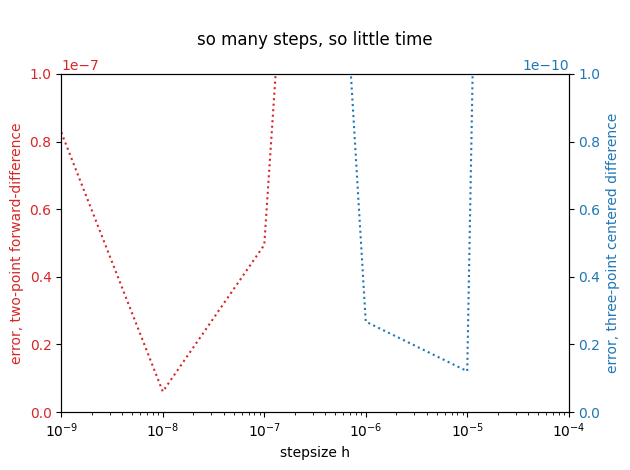

In [ ]:
# example 03

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  # methods
  f_2fd = lambda x,h: (np.exp(x+h) - np.exp(x))/h
  f_3cd = lambda x,h: (np.exp(x+h) - np.exp(x-h))/(2*h)

  # run, parms
  x = 0
  f_act = np.exp(x) # python as truth
  nh = 9
  hs = np.zeros((nh))
  fs_2fd = hs.copy()
  fs_3cd = hs.copy()

  for i in range(nh):
    hs[i] = pow(10,-(i+1))
    fs_2fd[i] = f_2fd(x,hs[i])
    fs_3cd[i] = f_3cd(x,hs[i])

  if True:
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((nh,1+2*2),np.nan) # cols = h,(method,error)x2
    ps[:,0] = hs
    ps[:,1] = fs_2fd
    ps[:,2] = f_act - ps[:,1]
    ps[:,3] = fs_3cd
    ps[:,4] = f_act - ps[:,3]
    sCol = ["h","2fd","2fd,err","3cd","3cd,err"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["h"] = df["h"].apply("{:.2g}".format)
    df["2fd"] = df["2fd"].apply("{:.16f}".format)
    df["2fd,err"] = df["2fd,err"].apply("{:.16f}".format)
    df["3cd"] = df["3cd"].apply("{:.16f}".format)
    df["3cd,err"] = df["3cd,err"].apply("{:.16f}".format)
    display(df)

  if True:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # 2nd y-axis

    # plot, data
    ax1.plot(hs,abs(f_act-fs_2fd),color="tab:red",linestyle=":")
    ax2.plot(hs,abs(f_act-fs_3cd),color="tab:blue",linestyle=":")

    # plot, style
    # shared
    plt.title("\nso many steps, so little time\n")
    ax1.set_xlabel("stepsize h")
    ax1.set_xscale("log")
    ax1.set_xlim(1e-09,1e-04)
    # two-point
    ax1.set_ylabel("error, two-point forward-difference",color="tab:red")
    ax1.tick_params(axis="y",labelcolor="tab:red")
    ax1.set_ylim(0,1e-07)
    # three-point
    ax2.set_ylabel("error, three-point centered difference",color="tab:blue")
    ax2.tick_params(axis="y",labelcolor="tab:blue")
    ax2.set_ylim(0,1e-10)

    # plot, display
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
  main()


below: dramatic image of where three-point centered-difference error does a turn-around when $h$ approaches FPS limits.
</br>


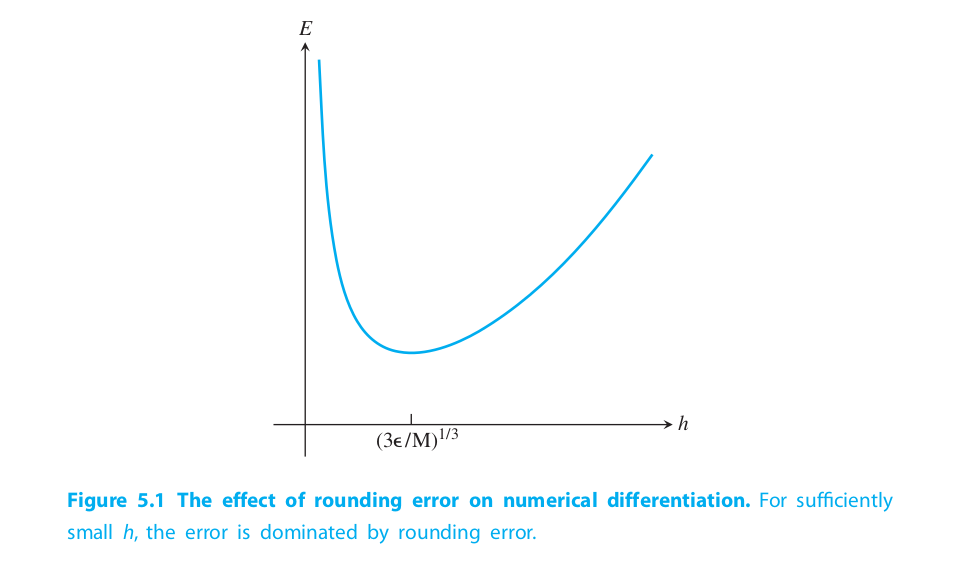

##### usw


as $h$ decreases error improves and then it doesnt. thats bc of loss of significance when subtracting small numbers from small numbers and the magnification of that error by dividing by small numbers.

the take-away is that three-point centered-difference formula improves as $h$ decreases until $h$ nears the size of the cube root of machine epsilon.

#### 5.1.3 extrapolation

given formula $F(h)$ of order $n$ that approximates quantity $Q$.
</br></br>

$$Q \approx F(h) + Kh^n$$
</br>

where $K$ is roughly constant over the range of $h$ of interest. eg,
</br></br>

$$f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \frac{f'''(c_h)}{6}h^2$$
</br>

where unknown $c_h$ between $x$ and $x+h$ and dependent on $h$. although $c_h$ is not constant, the function $f$ is reasonably smooth and $h$ is not too large, the error coefficient $\frac{f'''(c_h)}{6}$ should not vary far from $\frac{f'''(x)}{6}$.
</br></br>

bc $F(h)$ is of order $n$, if $\frac{h}{2}$ applied instead of $h$, error reduces from a constant times $h^n$ to a constant times $(\frac{h}{2})^n$ - ie, reduced by a factor of $2^n$. ie,
</br></br>

$$Q - F(\frac{h}{2}) \approx \frac{1}{2^n}(Q-F(h)).$$
</br>


##### <b>richardson extrapolation</b>: extrapolation for order $n$ formula


$$Q \approx \frac{2^nF(\frac{h}{2}) - F(h)}{2^n-1}.$$
</br>


##### usw

this formula typically gives a higher-order approximation of $Q$ than $F(h)$.
</br></br>

$$Q = F_n(h) + Kh^n + \mathcal{O}(h^{n+1})$$
</br>
$$\Rightarrow Q = F_n(\frac{h}{2}) + K\frac{h^n}{2^n} + \mathcal{O}((\frac{h}{2})^{n+1}).$$
</br>

extrapolated,
</br></br>

\begin{align}
F_{n+1}(h) &= \frac{2^nF_n(\frac{h}{2}) - F_n(h)}{2^n-1} \\ \\
&= \frac{2^n(Q-K\frac{h^n}{2^n}-\mathcal{O}(h^{n+1})) - (Q-Kh^n-\mathcal{O}(h^{n+1}))}{2^n -1} \\\\
&= \frac{(2^n - 1)\cdot Q - Kh^n + Kh^n - (2^n - 1)\cdot\mathcal{O}(h^{n+1})}{2^n -1} = Q - \mathcal{O}(h^{n+1}) \Rightarrow Q = F_{n+1}(h) + \mathcal{O}(h^{n+1}).
\end{align}
</br>

ie, $F_{n+1}(h)$ is at least an order $n+1$ formula for approximating $Q$.
</br></br>

[extrapolation wrt numerical analysis@wiki](https://en.wikipedia.org/wiki/Richardson_extrapolation) ~ "estimate by extrapolating the estimates to $h = 0$".


##### example 04


apply extrapolation to three-point centered difference formula.
</br>


\begin{align}
  f'(x) = F_2(x) &= \frac{f(x+h)-f(x-h)}{2h} \\
  \\
  F_{n+1}(x) = F_3(x) &= \frac{2^2F_2(\frac{h}{2}) - F_2(h)}{2^2-1} \\
  &= \frac{4\cdot\left[\frac{f(x+\frac{h}{2}) - f(x-\frac{h}{2})}{2\cdot\frac{h}{2}}\right] - \frac{f(x+h)-f(x-h)}{2h}}{3} \\
  &= \frac{\frac{8}{2h}\cdot\left[f(x+\frac{h}{2}) - f(x-\frac{h}{2})\right] - \frac{1}{2h}(f(x+h)-f(x-h))}{3} \\
  &= \frac{f(x-h) - 8f(x-\frac{h}{2}) + 8f(x+\frac{h}{2}) - f(x+h)}{6h} = F_4(x).
\end{align}
</br>

this is a five point centered difference formula. bc the order three error terms (ie, $\frac{h^2}{3!}f'''(c)$) cancel out, this is an order four formula. further, $F_4(h) = F_4(-h)$ so error for $h$ is the same as for $-h$; therfore, the error terms are only in terms of even powers of $h$.
</br>


##### example 05


apply extrapolation to second derivative formula.
</br>


\begin{align}
  f''(x) = F_2(x) &= \frac{f(x-h)-2f(x)+f(x+h)}{h^2} - \frac{h^2}{12}f^{(iv)}(c) \\
  \\
  F_{n+1}(x) = F_3(x) &= \frac{2^2F_2(\frac{h}{2}) - F_2(h)}{2^2-1} \\
  &= \frac{4\cdot\left[ \frac{f(x+\frac{h}{2})-2f(x)+f(x-\frac{h}{2})}{(\frac{h}{2})^2} \right] - \frac{f(x-h) - 2f(x) + f(x+h))}{h^2}}{3} \\
  &= \frac{\frac{16}{h^2}\cdot\left[ f(x+\frac{h}{2})-2f(x)+f(x-\frac{h}{2}) \right] - \frac{1}{h^2}\cdot(f(x-h) - 2f(x) + f(x+h))}{3} \\
  &= \frac{-f(x-h) + 16f(x-\frac{h}{2}) - 30f(x) + 16f(x+\frac{h}{2})- f(x+h)}{3h^2} = F_4(x) \text{ for same reasons as example 04}.
\end{align}
</br>


#### 5.1.4 symbolic differentiation and interpretation

super-uninterested; however, there will be a sympy example at the end of this set of lectures. plus a previous homework also contains an example.
</br>


##### sympy


###### code, basic examples


In [ ]:
# alright, fine.

#https://certik.github.io/scipy-2013-tutorial/html/tutorial/basic_operations.html
#https://certik.github.io/scipy-2013-tutorial/html/tutorial/calculus.html

from sympy import *

x,y,z = symbols("x y z")


In [ ]:
f = sin(3*x)
f.subs(x,y)
print(f)
print(f.subs(x,y))
print(f.subs(x,0))


sin(3*x)
sin(3*y)
0


In [ ]:
f = sqrt(8)
print(f)
f.evalf()


2*sqrt(2)
2.82842712474619


In [ ]:
pi.evalf(20)


3.1415926535897932385

In [ ]:
f = sin(3*x)
print(diff(f,x))
print(diff(f,x,x,x))
diff(f,x,3)


3*cos(3*x)
-27*cos(3*x)


-27*cos(3*x)

In [ ]:
f = sin(x)*cos(y)
diff(f,x,y)


-sin(y)*cos(x)

In [ ]:
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)
#diff(expr, x, y, 2, z, 4)
#diff(expr, x, y, y, z, 4)


x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [ ]:
deriv = Derivative(expr, x, y, y, z, 4)
deriv


Derivative(exp(x*y*z), x, (y, 2), (z, 4))

In [ ]:
f = sin(3*x)
f1 = diff(f,x)
f1

3*cos(3*x)

In [ ]:
f3 = diff(f,x,3) # or diff(f,x,x,x)
f3


-27*cos(3*x)

In [ ]:
f = sin(x)
integrate(f,x)


-cos(x)

In [ ]:
integrate(f,(x,0,pi))


2

In [ ]:
f = sin(x)**7
integrate(f)


cos(x)**7/7 - 3*cos(x)**5/5 + cos(x)**3 - cos(x)

In [ ]:
diff(f,x,7)


7*(-19279*sin(x)**6 + 69930*sin(x)**4*cos(x)**2 - 27720*sin(x)**2*cos(x)**4 + 720*cos(x)**6)*cos(x)

###### code, specific purpose example from previous coursework


In [ ]:
# nmi, hw04, q5 with sympy to display unevaluated fractions

import numpy as np
import sympy as s

def sym_cg(aA,ab,ax0,adisplay=True):
  A,x_old,b,r_old,d,α,β = s.symbols("A,x_old,b,r_old,d,α,β")

  A = s.Matrix(aA)
  b = s.Matrix(ab)
  x_old = s.Matrix(ax0)
  x_new = None

  Ax = s.Matrix([A.row(0).dot(x_old),A.row(1).dot(x_old)])
  r_old = b.copy() - Ax
  d_old = r_old.copy()

  r_zero = s.Matrix([[0],[0]])
  n = len(x_old)
  for i in range(n):
    if r_old == r_zero:
      break

    Ad = s.Matrix([A.row(0).dot(d_old),A.row(1).dot(d_old)])
    α = r_old.col(0).dot(r_old) / d_old.dot(Ad)
    x_new = x_old + α*d_old
    r_new = r_old - α*Ad
    β = r_new.col(0).dot(r_new) / r_old.col(0).dot(r_old)
    d_new = r_new + β*d_old

    if adisplay:
      print(f"\nstep : {i+1} of {n}\n")
      print(f"A·d[{i}] : {Ad}")
      print(f"α : {α}")
      print(f"x[{i+1}] : {x_new}")
      print(f"r[{i+1}] : {r_new}")
      print(f"β : {β}")
      print(f"d[{i+1}] : {d_new}")

    x_old = x_new.copy()
    r_old = r_new.copy()
    d_old = d_new.copy()

  return x_new

def main():
  # problem, original
  A = [[[1,-1],[-1,5]]] # 3rd set nested brackets for subsequent problems
  b = [[[3],[-7]]]
  x0 = [[[0],[0]]]

  # problem w smaller RHS
  A.append([[1,2],[2,5]])
  b.append([[1],[1]])
  x0.append([[0],[0]])
  print(A[0])

  for i in range(len(A)):
    print(f"\nversion {i}, solution x : {sym_cg(A[i],b[i],x0[i])}")

if __name__ == "__main__":
  main()


[[1, -1], [-1, 5]]

step : 1 of 2

A·d[0] : Matrix([[10], [-38]])
α : 29/148
x[1] : Matrix([[87/148], [-203/148]])
r[1] : Matrix([[77/74], [33/74]])
β : 121/5476
d[1] : Matrix([[6061/5476], [1595/5476]])

step : 2 of 2

A·d[1] : Matrix([[2233/2738], [957/2738]])
α : 37/29
x[2] : Matrix([[2], [-1]])
r[2] : Matrix([[0], [0]])
β : 0
d[2] : Matrix([[0], [0]])

version 0, solution x : Matrix([[2], [-1]])

step : 1 of 2

A·d[0] : Matrix([[3], [7]])
α : 1/5
x[1] : Matrix([[1/5], [1/5]])
r[1] : Matrix([[2/5], [-2/5]])
β : 4/25
d[1] : Matrix([[14/25], [-6/25]])

step : 2 of 2

A·d[1] : Matrix([[2/25], [-2/25]])
α : 5
x[2] : Matrix([[3], [-1]])
r[2] : Matrix([[0], [0]])
β : 0
d[2] : Matrix([[0], [0]])

version 1, solution x : Matrix([[3], [-1]])


### miscellaney


* richardsons extrapolation wrt simpsons rule (lecture 12, 24/03/13) [@iitm](https://www.youtube.com/watch?v=KITIYW4wq3o)
</br>
